<a href="https://colab.research.google.com/github/shahista037/RD-INFRO-TECHNOLOGY/blob/main/MovieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


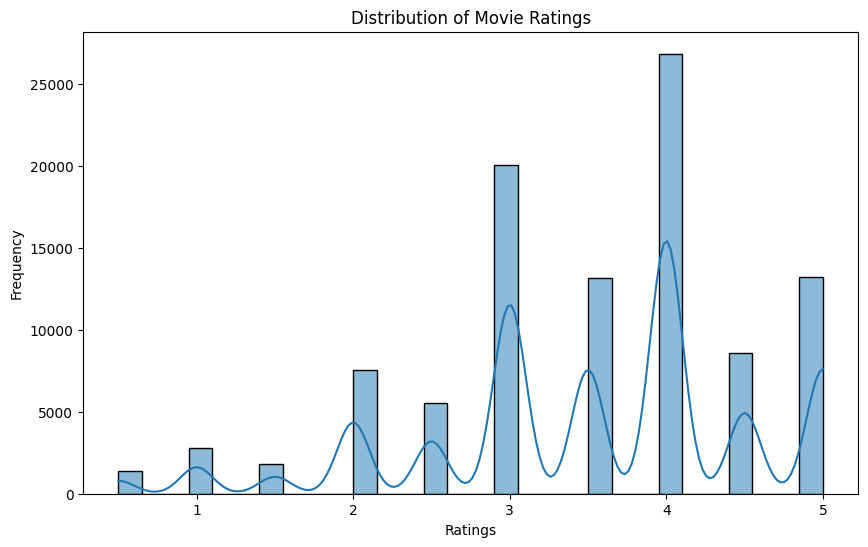

Mean Squared Error: 0.8824484861403942
R^2 Score: 0.19780388283321282


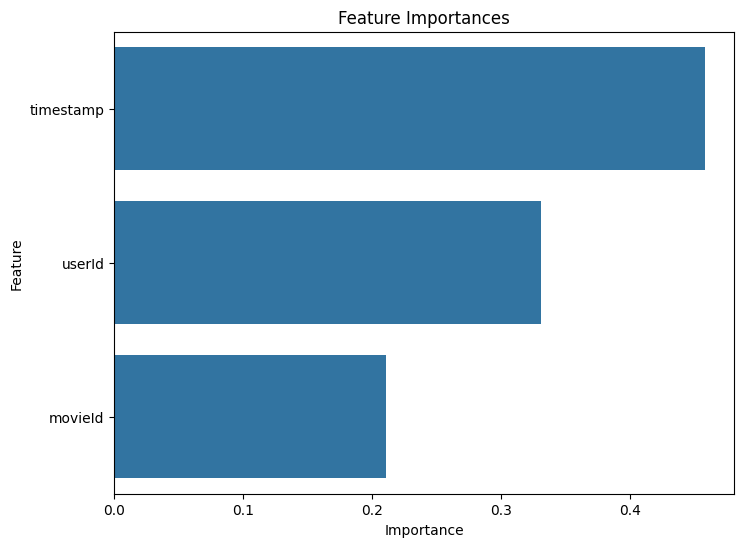

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import zipfile
import requests
import io

# Step 1: Download and Extract the Dataset
url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall("movielens_data")

# Load the ratings dataset
movielens_data = pd.read_csv("movielens_data/ml-latest-small/ratings.csv")

print("Dataset Head:\n", movielens_data.head())
print("\nDataset Info:\n")
movielens_data.info()

# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(movielens_data['rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Step 3: Data Preprocessing
# Label Encoding for Categorical Variables
le_user = LabelEncoder()
le_movie = LabelEncoder()

movielens_data['userId'] = le_user.fit_transform(movielens_data['userId'])
movielens_data['movieId'] = le_movie.fit_transform(movielens_data['movieId'])

# Prepare Features and Target Variable
X = movielens_data[['userId', 'movieId', 'timestamp']]
y = movielens_data['rating']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Feature Importance Visualization
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()